In [3]:
# Imports and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
import scikitplot as skplot
df = pd.read_csv(r'C:\Users\prach\OneDrive\Desktop\DS_Learn\DS_Project\iris.csv', encoding='utf-8')

In [4]:
# Label Encoding
def labelEncode(data, columns):
    for i in columns:
        data[i + '_'], _ = pd.factorize(data[i], sort=True)

labelEncode(df, df.columns)

In [5]:
# Feature and Target Selection
enc_columns = ['sepal_length_', 'sepal_width_', 'petal_length_', 'petal_width_']
X = df[enc_columns]
y = df.species_

In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
y_targets = df['species'].unique()

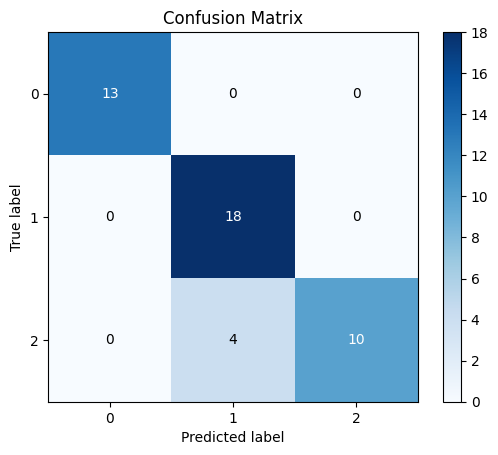

Accuracy Score: 0.9111111111111111
cross-validation [1.         1.         0.9        0.93333333 1.        ]

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.82      1.00      0.90        18
   virginica       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



In [7]:
# SVM Model Training and Evaluation
from sklearn.svm import SVC
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train, y_train)

y_pred_SVM = model_SVM.predict(X_test)
skplot.metrics.plot_confusion_matrix(y_test, y_pred_SVM, normalize=False)
plt.show()
accuracy_score_SVM = accuracy_score(y_test, y_pred_SVM)
cross_val_score_SVM = cross_val_score(model_SVM, X, y, cv=5)
classification_report_SVM = classification_report(y_test, y_pred_SVM, target_names=y_targets)
print('Accuracy Score:', accuracy_score_SVM)
print('cross-validation', cross_val_score_SVM)
print('\n', classification_report_SVM)

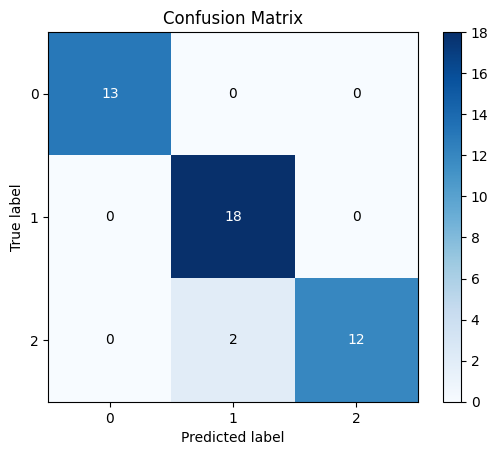

Accuracy Score: 0.9555555555555556
cross-validation [0.96666667 1.         0.93333333 0.96666667 1.        ]

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.90      1.00      0.95        18
   virginica       1.00      0.86      0.92        14

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



In [8]:
# KNN Model Training and Evaluation
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=6)
model_KNN.fit(X_train, y_train)

y_pred_KNN = model_KNN.predict(X_test)
skplot.metrics.plot_confusion_matrix(y_test, y_pred_KNN, normalize=False)
plt.show()
accuracy_score_KNN = accuracy_score(y_test, y_pred_KNN)
cross_val_score_KNN = cross_val_score(model_KNN, X, y, cv=5)
classification_report_KNN = classification_report(y_test, y_pred_KNN, target_names=y_targets)
print('Accuracy Score:', accuracy_score_KNN)
print('cross-validation', cross_val_score_KNN)
print('\n', classification_report_KNN)

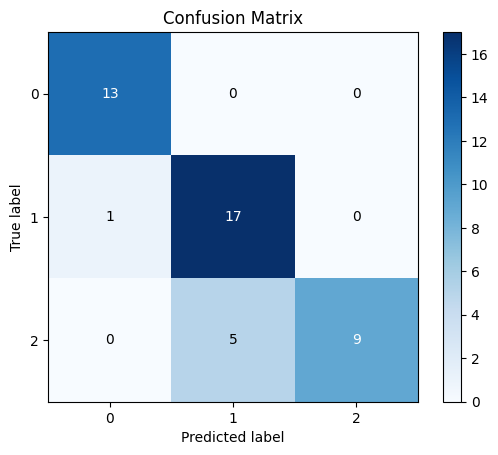

Accuracy Score: 0.8666666666666667
cross-validation [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]

               precision    recall  f1-score   support

      setosa       0.93      1.00      0.96        13
  versicolor       0.77      0.94      0.85        18
   virginica       1.00      0.64      0.78        14

    accuracy                           0.87        45
   macro avg       0.90      0.86      0.87        45
weighted avg       0.89      0.87      0.86        45



In [9]:
# Random Forest Model Training and Evaluation:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=80)
model_RF.fit(X_train, y_train)

y_pred_RF = model_RF.predict(X_test)
skplot.metrics.plot_confusion_matrix(y_test, y_pred_RF, normalize=False)
plt.show()
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
cross_val_score_RF = cross_val_score(model_RF, X, y, cv=5)
classification_report_RF = classification_report(y_test, y_pred_RF, target_names=y_targets)
print('Accuracy Score:', accuracy_score_RF)
print('cross-validation', cross_val_score_RF)
print('\n', classification_report_RF)

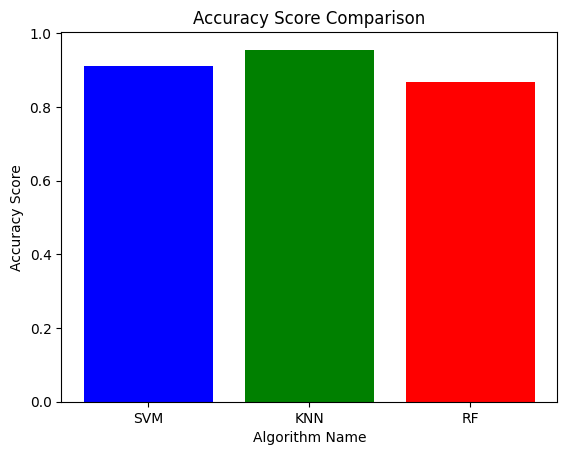

In [15]:
# Accuracy Score Comparison
AccScore = accuracy_score_SVM, accuracy_score_KNN, accuracy_score_RF
Name = 'SVM','KNN','RF'
plt.bar(Name, AccScore, color=['blue', 'green', 'red'])
plt.xlabel('Algorithm Name')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison')
plt.show()

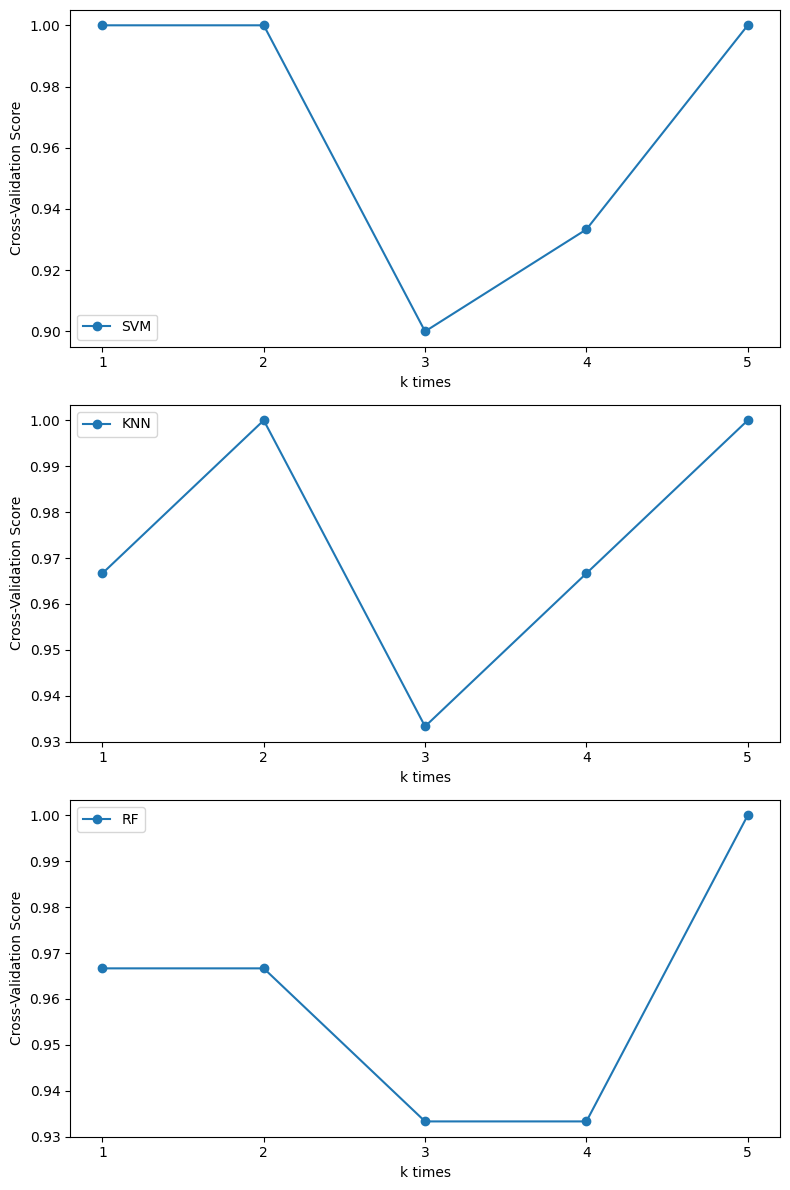

In [16]:
# Cross-Validation Score Comparison
x = (1, 2, 3, 4, 5)
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot SVM cross-validation scores
axs[0].plot(x, cross_val_score_SVM, label='SVM', marker='o')
axs[0].set_xticks(x)
axs[0].set_xlabel('k times')
axs[0].set_ylabel('Cross-Validation Score')
axs[0].legend()

# Plot KNN cross-validation scores
axs[1].plot(x, cross_val_score_KNN, label='KNN', marker='o')
axs[1].set_xticks(x)
axs[1].set_xlabel('k times')
axs[1].set_ylabel('Cross-Validation Score')
axs[1].legend()

# Plot RF cross-validation scores
axs[2].plot(x, cross_val_score_RF, label='RF', marker='o')
axs[2].set_xticks(x)
axs[2].set_xlabel('k times')
axs[2].set_ylabel('Cross-Validation Score')
axs[2].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [13]:
# Generate classification reports as dictionaries
cr_SVM_dict = classification_report(y_test, y_pred_SVM, target_names=y_targets, output_dict=True)
cr_KNN_dict = classification_report(y_test, y_pred_KNN, target_names=y_targets, output_dict=True)
cr_RF_dict = classification_report(y_test, y_pred_RF, target_names=y_targets, output_dict=True)

# Convert dictionaries to DataFrames
df_SVM = pd.DataFrame.from_dict(cr_SVM_dict)
df_KNN = pd.DataFrame.from_dict(cr_KNN_dict)
df_RF = pd.DataFrame.from_dict(cr_RF_dict)

# Concatenate DataFrames along columns
result = pd.concat([df_SVM, df_KNN, df_RF], axis=1, keys=['SVM', 'KNN', 'RF'])

result

SVM                                                          \
          setosa versicolor  virginica  accuracy  macro avg weighted avg   
precision    1.0   0.818182   1.000000  0.911111   0.939394     0.927273   
recall       1.0   1.000000   0.714286  0.911111   0.904762     0.911111   
f1-score     1.0   0.900000   0.833333  0.911111   0.911111     0.908148   
support     13.0  18.000000  14.000000  0.911111  45.000000    45.000000   

             KNN                                                          \
          setosa versicolor  virginica  accuracy  macro avg weighted avg   
precision    1.0   0.900000   1.000000  0.955556   0.966667     0.960000   
recall       1.0   1.000000   0.857143  0.955556   0.952381     0.955556   
f1-score     1.0   0.947368   0.923077  0.955556   0.956815     0.955016   
support     13.0  18.000000  14.000000  0.955556  45.000000    45.000000   

                  RF                                                          
              setosa versicolor  virginica  accuracy  macro avg weighted avg  
precision   0.928571   0.772727   1.000000  0.866667   0.900433     0.888456  
recall      1.000000   0.944444   0.642857  0.866667   0.862434     0.866667  
f1-score    0.962963   0.850000   0.782609  0.866667   0.865191     0.861668  
support    13.000000  18.000000  14.000000  0.866667  45.000000    45.000000